In [3]:
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

import seaborn as sns
sns.set()

In [4]:
df = pd.read_csv('data/house-prices-advanced-regression-techniques/train.csv')

df.info()

df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
979,980,20,RL,80.0,8816,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2009,WD,Normal,139000
1237,1238,60,RL,41.0,12393,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Normal,195000
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
607,608,20,RL,78.0,7800,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,225000
756,757,60,RL,68.0,10769,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,212000


In [9]:
df.isnull().mean().sort_values(ascending=False).head(10)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageCond      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
dtype: float64

In [11]:
df = df.dropna(thresh=0.85*len(df), axis='columns')
df.isnull().mean().sort_values(ascending=False).head(10)

GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageCond      0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
dtype: float64

In [14]:
# uniquement ces lignes ou garage est vide
c = df['GarageType'].isnull()

# uniquement les colonnes congtenant 'Garage'
cols = [col for col in df.columns if 'Garage' in col]

# Affiche moi ça
df.loc[c].sample(5)[cols]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
1449,NaN,NaN,NaN,0,0,NaN,NaN
826,NaN,NaN,NaN,0,0,NaN,NaN
976,NaN,NaN,NaN,0,0,NaN,NaN
635,NaN,NaN,NaN,0,0,NaN,NaN
1218,NaN,NaN,NaN,0,0,NaN,NaN


In [20]:
c = (df['GarageCars'] == 0)

cols = ['GarageType', 'GarageFinish', 'GarageCond', 'GarageQual']
df.loc[c, cols] = df.loc[c, cols].fillna('No Garage')

cols = ['GarageYrBlt', 'GarageArea']
df.loc[c, cols] = df.loc[c, cols].fillna(-1)

In [23]:
df.isnull().mean().sort_values(ascending=False).head(5)

BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtFinType1    0.025342
BsmtCond        0.025342
dtype: float64

In [24]:
c = df['BsmtCond'].isnull()

cols = [col for col in df.columns if 'Bsmt' in col]

df.loc[c, cols] = df.loc[c, cols].fillna('No Basement')

# En plus, on élimine deux colonnes
df = df.drop(columns=['BsmtFinType2', 'BsmtExposure'])

df.isnull().mean().sort_values(ascending=False).head(5)

MasVnrType    0.005479
MasVnrArea    0.005479
Electrical    0.000685
SalePrice     0.000000
ExterCond     0.000000
dtype: float64

In [29]:
df = df.dropna(axis='columns')
df.isnull().mean().sort_values(ascending=False).head(5)

SalePrice      0.0
Foundation     0.0
RoofStyle      0.0
RoofMatl       0.0
Exterior1st    0.0
dtype: float64

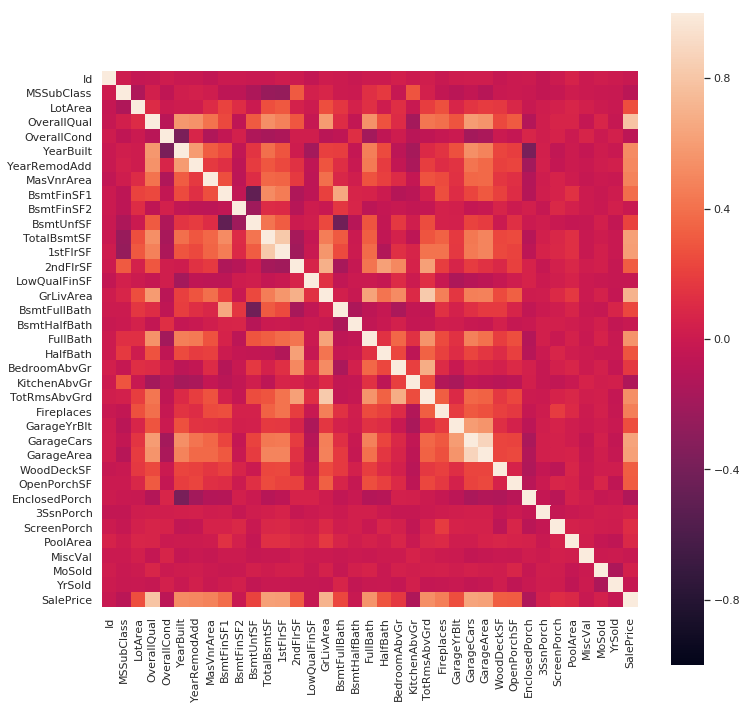

In [27]:
matcorr = df.corr()
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(matcorr, vmin=-1, vmax=1, square=True)

In [ ]:
# Corrélations positives importantes
df = df.drop(columns=['TotalBsmtSF', 'GarageCars', 'GarageYrBlt'])

In [32]:
# Corrélations négatives importantes
df = df.drop(columns=['EnclosedPorch', 'BsmtUnfSF'])

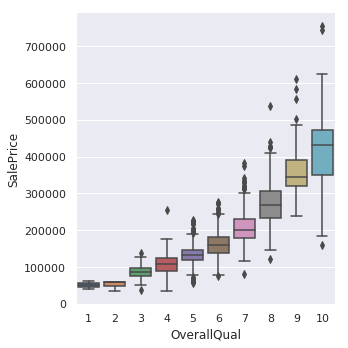

In [33]:
sns.catplot(data=df, x='OverallQual', y='SalePrice', kind='box')

# Régression

In [34]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [38]:
scores = cross_val_score(SVR(gamma='scale'), df[['OverallQual']], df['SalePrice'], cv=5,
                         scoring='neg_mean_squared_error')
np.sqrt(-scores)

array([76857.98209158, 83434.08692693, 89389.90046023, 71641.86534426,
       84033.28584155])

### Comparaison avec un estimateur moyen

In [39]:
from sklearn.dummy import DummyRegressor

In [40]:
scores = cross_val_score(DummyRegressor(strategy='mean'),
                         df[['OverallQual']], df['SalePrice'], cv=5,
                         scoring='neg_mean_squared_error')
np.sqrt(-scores)

array([74388.65020525, 81100.33869009, 87170.37756394, 71848.01002052,
       81903.03533994])

## Autres régresseurs

In [41]:
from sklearn.linear_model import Lasso, Ridge

In [42]:
# Ridge
scores = cross_val_score(Ridge(),
                         df[['OverallQual']], df['SalePrice'], cv=5,
                         scoring='neg_mean_squared_error')
np.sqrt(-scores)

array([43227.33837079, 48486.24947138, 55109.61852308, 44354.6550627 ,
       51285.4034822 ])

In [43]:
# Lasso
scores = cross_val_score(Lasso(),
                         df[['OverallQual']], df['SalePrice'], cv=5,
                         scoring='neg_mean_squared_error')
np.sqrt(-scores)

array([43226.9284743 , 48486.46505925, 55106.0922053 , 44359.56048883,
       51285.30828226])

## Creusons les facteurs explicatifs

In [65]:
dfs = []
for i in range(len(df.columns)):
    # On prend les i premières colonnes
    X = df.iloc[:, :i+1]
    
    # On élimine les colonnes qui ne sont pas des nombres
    cols = [col for col in X.columns if X[col].dtype == np.int64]
    X = X[cols]
    
    # au cas où il y ait des erreurs
    try:
        scores = cross_val_score(Lasso(),
                                 X, =df['SalePrice'], cv=5,
                                 scoring='neg_mean_squared_error')
        dfs.append(
            pd.DataFrame({
                'score': np.sqrt(-scores),
                'column': df.columns[i]
            })
        )
    except:
        pass

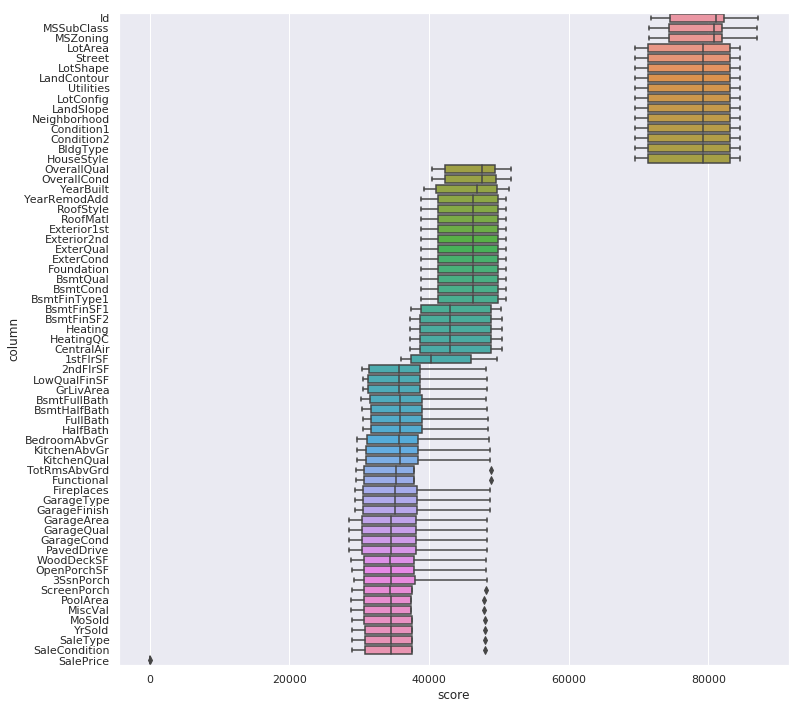

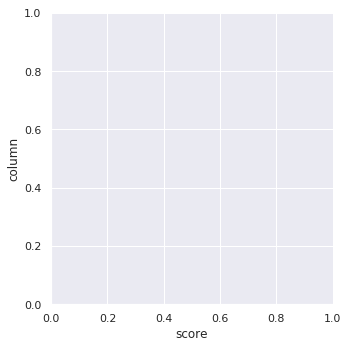

In [70]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.catplot(data=pd.concat(dfs), y='column', x='score', kind='box', ax=ax)